## EXP NO: 1 Boston Housing

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
# Load boston dataset from Github
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

In [21]:
# Feature and Target
x = data[["rm"]]
y = data["medv"]

In [23]:
# Split and Train
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)
model = LinearRegression().fit(x_train, y_train)
y_pred =model.predict(x_test)

In [25]:
# Results 
print("R2 Dcore:",r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Dcore: 0.3707569232254778
MSE: 46.144775347317264


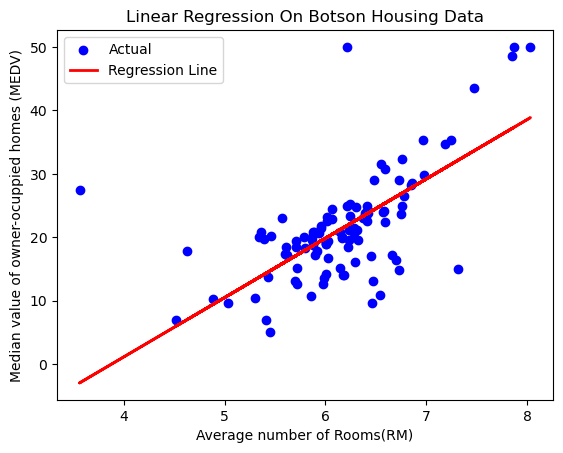

In [27]:
# Plot regression line
plt.scatter(x_test, y_test, color="blue", label = "Actual")
plt.plot(x_test, y_pred, color="red", linewidth =2 ,label="Regression Line")
plt.xlabel("Average number of Rooms(RM)")
plt.ylabel("Median value of owner-ocuppied homes (MEDV)")
plt.title("Linear Regression On Botson Housing Data")
plt.legend()
plt.show()

## EXP NO: 2 Decision Tree

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ✅ Load local dataset
data = pd.read_csv("adult.csv")   # make sure the file is in the same directory

# ✅ Preprocessing
data = data.dropna()   # remove missing rows
X = data.drop('income', axis=1)
y = data['income']

# ✅ Convert categorical → numeric
X = pd.get_dummies(X, drop_first=True)

# ✅ Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train Decision Tree model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# ✅ Predict & evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.8131429448794718

Confusion Matrix:
 [[4342  634]
 [ 583  954]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      4976
        >50K       0.60      0.62      0.61      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.75      0.74      6513
weighted avg       0.82      0.81      0.81      6513



In [39]:
Apply Random Forest Algorithm on Adult Census Income
Dataset and analyze the performance of the model

SyntaxError: invalid syntax (1939423799.py, line 1)

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ✅ Load local dataset
data = pd.read_csv("adult.csv")   # make sure file is in same folder

# ✅ Basic preprocessing
data = data.dropna()
X = data.drop('income', axis=1)
y = data['income']

# ✅ Convert categorical → numeric
X = pd.get_dummies(X, drop_first=True)

# ✅ Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train Random Forest model
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# ✅ Predict & evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.849531705819131

Confusion Matrix:
 [[4604  372]
 [ 608  929]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4976
        >50K       0.71      0.60      0.65      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.85      6513



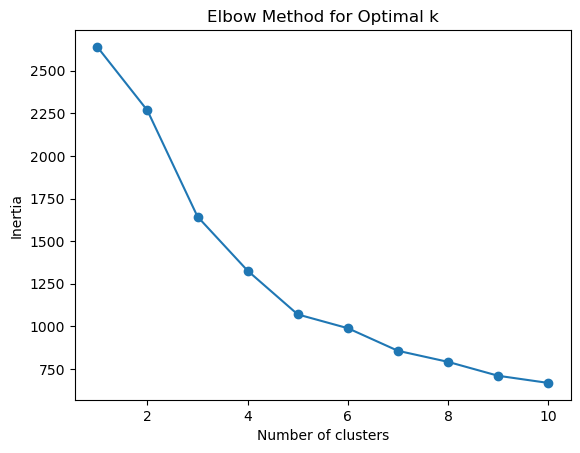

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.282857  2.534286   8935.500000   4228.528571   5848.034286   
1        1.113208  2.698113  34540.113208   5860.358491   6122.622642   
2        2.000000  2.405405   8704.864865  20534.405405  30466.243243   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        2167.231429       1913.605714  1102.120000  
1        9841.735849        981.471698  3664.245283  
2        1932.621622      14758.837838  2459.351351  


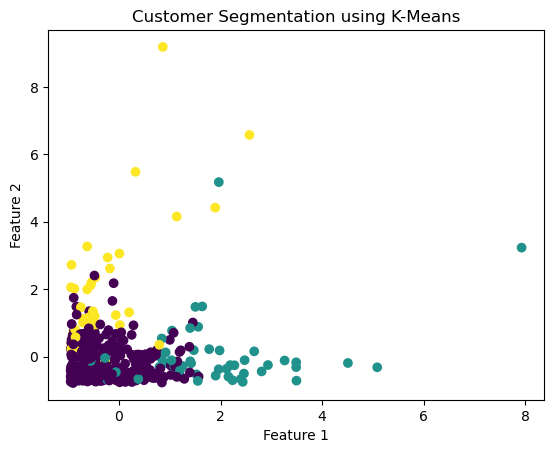

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ✅ Step 1: Load Dataset (local file)
data = pd.read_csv("Wholesale customers data.csv")

# ✅ Step 2: Select relevant features (drop categorical columns)
X = data.drop(['Channel', 'Region'], axis=1)

# ✅ Step 3: Normalize data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 4: Find optimal number of clusters using Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# ✅ Step 5: Apply K-Means with chosen number of clusters (say k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# ✅ Step 6: Analyze results
print(data.groupby('Cluster').mean())

# ✅ Optional: Visualize clusters (using first 2 features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1️⃣ Load local dataset
data = pd.read_csv("adult.csv")   # make sure file is in same folder
data = data.dropna()

# 2️⃣ Features and Target
X = data.drop('income', axis=1)
y = data['income']

# 3️⃣ Convert categorical to numeric
X = pd.get_dummies(X, drop_first=True)

# 4️⃣ Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Apply PCA
pca = PCA(n_components=10)  # reduce to 10 components
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratio:", sum(pca.explained_variance_ratio_))

# 6️⃣ Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 7️⃣ Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8️⃣ Predict & Evaluate
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Explained Variance Ratio: 0.20241039749383719
✅ Accuracy: 0.8278826961461692

Confusion Matrix:
 [[4547  429]
 [ 692  845]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      4976
        >50K       0.66      0.55      0.60      1537

    accuracy                           0.83      6513
   macro avg       0.77      0.73      0.75      6513
weighted avg       0.82      0.83      0.82      6513



In [51]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1️⃣ Load dataset
data = pd.read_csv("adult.csv")   # local file
data = data.dropna()

# 2️⃣ Features & Target
X = data.drop('income', axis=1)
y = data['income']

# 3️⃣ Convert categorical → numeric
X = pd.get_dummies(X, drop_first=True)

# 4️⃣ Choose experiment
# Options: 'decision_tree', 'random_forest', 'pca_rf'
model_type = 'random_forest'  # Change this line for different experiments

# 5️⃣ Prepare model
if model_type == 'decision_tree':
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(criterion='entropy', random_state=42)

elif model_type == 'random_forest':
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

elif model_type == 'pca_rf':
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.decomposition import PCA
    # Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # PCA
    pca = PCA(n_components=10)
    X = pca.fit_transform(X_scaled)
    model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

# 6️⃣ Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7️⃣ Train & Predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 8️⃣ Evaluate
print("✅ Experiment:", model_type)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Experiment: random_forest
Accuracy: 0.849531705819131

Confusion Matrix:
 [[4604  372]
 [ 608  929]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4976
        >50K       0.71      0.60      0.65      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.85      6513



R2 Score: 0.3707569232254778
Mean Squred Error(MSE) : 46.144775347317264


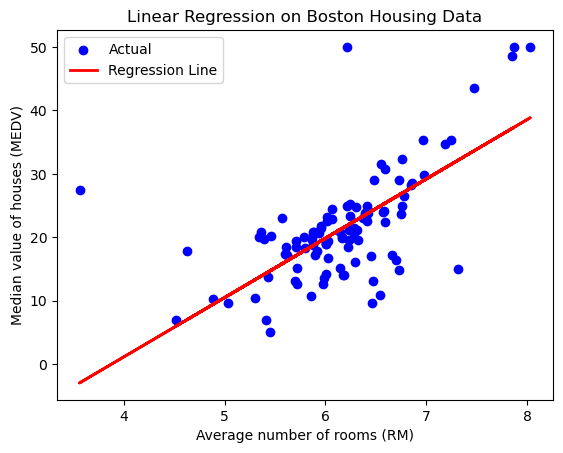

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

url =  "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

x = df[["rm"]]
y = df["medv"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 , random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("R2 Score:", r2_score(y_test,y_pred))
print("Mean Squred Error(MSE) :", mean_squared_error(y_test, y_pred))

plt.scatter(x_test, y_test, color='blue', label='Actual') 
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression Line') 
plt.xlabel("Average number of rooms (RM)") 
plt.ylabel("Median value of houses (MEDV)") 
plt.title("Linear Regression on Boston Housing Data") 
plt.legend() 
plt.show()

In [5]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
data = pd.read_csv("adult.csv") 
data = data.dropna() 
X = data.drop('income', axis=1) 
y = data['income'] 
X = pd.get_dummies(X, drop_first=True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
model = DecisionTreeClassifier(criterion='entropy', random_state=42) 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) 
print("Classification Report:\n", classification_report(y_test, y_pred)) 

Accuracy: 0.8131429448794718
Confusion Matrix:
 [[4342  634]
 [ 583  954]]
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      4976
        >50K       0.60      0.62      0.61      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.75      0.74      6513
weighted avg       0.82      0.81      0.81      6513



R2 Score: 0.3707569232254778
MSE 46.144775347317264


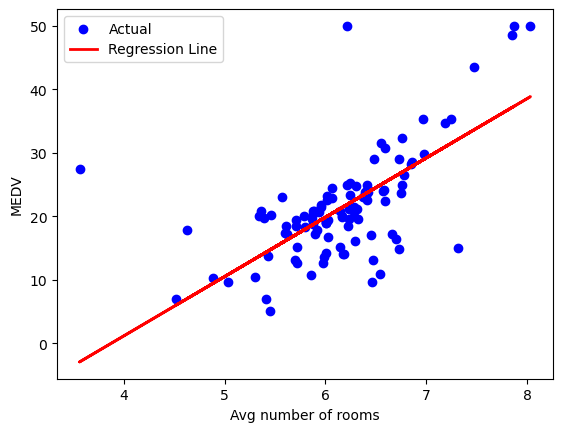

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

x = data[["rm"]]
y = data["medv"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
model = LinearRegression().fit(x_train, y_train)
y_pred =  model.predict(x_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

plt.scatter(x_test, y_test, color = "blue", label = "Actual")
plt.plot(x_test, y_pred, color = "red", linewidth =2,label= "Regression Line")
plt.xlabel("Avg number of rooms")
plt.ylabel("MEDV")
plt.legend()
plt.show()

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv("adult.csv")

data = data.dropna()
x = data.drop('income', axis =1)
y = data['income']

# converting categorical to numeric
x = pd.get_dummies(x, drop_first = True)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state = 42)

model = DecisionTreeClassifier(criterion = "entropy", random_state = 42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification_Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8131429448794718

Confusion Matrix:
 [[4342  634]
 [ 583  954]]

Classification_Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      4976
        >50K       0.60      0.62      0.61      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.75      0.74      6513
weighted avg       0.82      0.81      0.81      6513



In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv("adult.csv")

data = data.dropna()
x = data.drop('income', axis =1)
y = data['income']

# converting categorical to numeric
x = pd.get_dummies(x, drop_first = True)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state = 42)

model = RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state = 42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification_Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.849531705819131

Confusion Matrix:
 [[4604  372]
 [ 608  929]]

Classification_Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4976
        >50K       0.71      0.60      0.65      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.85      6513

